<div align="right"> <h1 align="right">Anhang 5</h1></div>

<div align="center"> <h1 align="center">Variante Visualisierungen: Dokumentation der Optionen</h1></div>

Im Folgenden werden beispielhaft neun verschiednene Visualisierungen eines Netzwerkgraphens vorgestellt, die mit den Personendaten der Hamburg-Bibliographie und der Python-Bibliothek Pyvis erstellt wurden. Dabei werden auch drei Varianten vorgestellt, die in der tatsächlichen Nutzung weniger gut verwendbar wären, um zu verdeutlichen, dass die Darstellung der Daten innerhalb der angebotenen Optionen immer auch ein Abgleichen mit den individuellen Bedürfnisanforderungen ist. Datenpool für die Erstellung sind die mit dem Skript in Anhang 1 erzeugten json-Dateien: in Beziehung gesetzt werden einerseits Personen (Value "name") und ihre relationierten Verwandten (Value "relation_fam") sowie Personen und ihre relationierten Berufe (Value "job"). Bezug genommen wird u.a. auf die Ausarbeitung und ihren Anhängen sowie an dieser Stelle vor allem auf die Dokumentation der Software Pyvis (Pyvis 2022b, https://pyvis.readthedocs.io/en/latest/documentation.html). Flankierend zu nutzen sind die Visualisierungen unter https://schumahe.github.io/hhbib_networkGraph/. Es wird jeweils der Code für den Graphen und folgend eine Visualisierung dessen aufgeführt.

In [2]:
from pyvis.network import Network
import random
import json

## Ausgangsskript

In [ ]:
with open("hh_persons_fam_2.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        for line in infile_2:
            hh_name = line[:-1]
            hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
        g = Network(height="1000px", width="100%", bgcolor="#FBFCFC", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        for hamburg in data_fam_2:
            g.add_node(hamburg, color="#2471A3", size=100)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
        for person in hhbib_data:
            name = person["name"][0]
            relation = person["relation_fam"]
            bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            random_colnumber = random.randint(0, 17687459)
            hex_number = str(hex(random_colnumber))
            hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
            g.add_node(name, color=hex_number, title=bio, size=50) 
            
            # Erzeugung der relationierten Nodes sowie den Edges
            for rela in relation:     
                g.add_node(rela, color=hex_number, size=50)
                g.add_edge(name, rela)
                
                # Erzeugung der "Hamburg-Edges"
                for item in hamburg_edges:
                    if item == name:
                        g.add_edge(hamburg, name)
                    if item == rela:
                        g.add_edge(hamburg, rela)
        
        # Layout-Algorithmen
        g.barnes_hut()        
        #g.force_atlas_2based()
        #g.hrepulsion()
        #g.repulsion()
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
        
        # Erzeugung der Visualisierung und der html-Datei
        g.show("hhbib_networkGraph_1.html")

## Graph #1
Der erste Graph zeigt verwandtschaftliche Zusammenhänge. Diese werden durch die Farbgebung unterstützt. Die Generierung der zufälligen Hex-Colors für die Nodes wird durch die abhängige Iteration an die Verwandten weitergegeben (Ausnahmen begründen falsche Originaldaten). Ebenso sind die Nodes durch die Visualisierung der Edges von dem Hamburg-Node (vgl. Ausarbeitungstext sowie Anhang 1) zu den Familien gruppiert. Besonders macht diese Visualisierung der hohe Node-Abstand aus, definiert im Layout-Algorithmus "repulsion" und in abstossendem Zusammenhang mit dem Node-Abstandswert, der die Nodes mit Hilfe von geraden Edges weiträumig gruppiert.

In [ ]:
with open("hh_persons_fam_2.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        for line in infile_2:
            hh_name = line[:-1]
            hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
        g = Network(height="1000px", width="100%", bgcolor="#f5f5f5", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        for hamburg in data_fam_2:
            g.add_node(hamburg, color="#cd0000", size=20)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
        for person in hhbib_data:
            name = person["name"][0]
            relation = person["relation_fam"]
            bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            random_colnumber = random.randint(0, 17687459)
            hex_number = str(hex(random_colnumber))
            hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
            g.add_node(name, color=hex_number, title=bio, size=12) 
            
            # Erzeugung der relationierten Nodes sowie den Edges
            for rela in relation:     
                g.add_node(rela, color=hex_number, size=12)
                g.add_edge(name, rela, color="#b5b5b5", smooth=False)
                
                # Erzeugung der "Hamburg-Edges"
                for item in hamburg_edges:
                    if item == name:
                        g.add_edge(hamburg, name, color="#b5b5b5", smooth=False)
                    if item == rela:
                        g.add_edge(hamburg, rela, color="#b5b5b5", smooth=False)
        
        # Layout-Algorithmen
        #g.barnes_hut(overlap=0.5, spring_length=870, central_gravity=1.5)        
        #g.force_atlas_2based(spring_length=-10, overlap=0, spring_strength=0.099)
        #g.hrepulsion()
        g.repulsion(node_distance=259)
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
    
        # Erzeugung der Visualisierung und der html-Datei
        #g.show("hhbib_networkGraph_5-65.html")

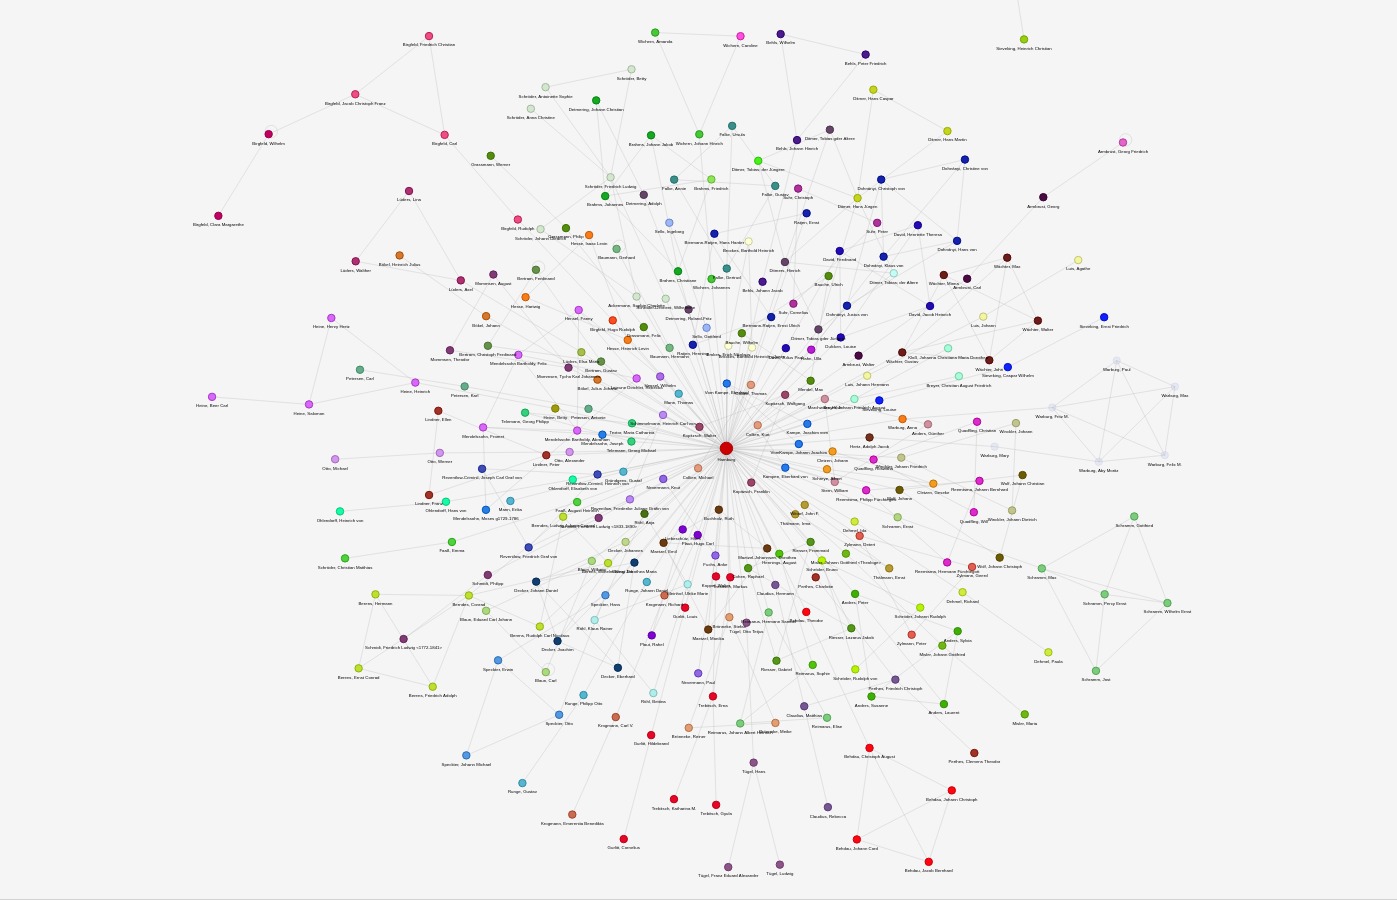

## Graph #2
Die zweite Visualisierung zeigt einen Graphen, der ohne die Verbindung von Edges mit dem Hamburg-Node von einzelnen Familiensubnetzen geprägt ist und durch "weiche" Edges einen schwungvollen Charakter erhält. Die Nodes sind dabei durch einen leicht erhöhten Wert der central_gravity als Argument der Algorithmusfunktion "repulsion" in die Mitte gezogen. Die farbliche Dualität spiegelt Nodes mit und ohne "title"-Information wieder.

In [ ]:
with open("hh_persons_fam_2.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    #hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    #with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        #for line in infile_2:
            #hh_name = line[:-1]
            #hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
    g = Network(height="1000px", width="100%", bgcolor="#f5f5f5", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        #for hamburg in data_fam_2:
            #g.add_node(hamburg, color="#2471A3", size=100)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
    for person in hhbib_data:
        name = person["name"][0]
        relation = person["relation_fam"]
        bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            #random_colnumber = random.randint(0, 17687459)
            #hex_number = str(hex(random_colnumber))
            #hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
        g.add_node(name, color="#CB4335", title=bio, size=11) 
            
            # Erzeugung der relationierten Nodes sowie den Edges
        for rela in relation:     
            g.add_node(rela, color="#2471A3", size=11)
            g.add_edge(name, rela, color="#018786")
                
                # Erzeugung der "Hamburg-Edges"
                #for item in hamburg_edges:
                    #if item == name:
                        #g.add_edge(hamburg, name)
                    #if item == rela:
                        #g.add_edge(hamburg, rela)
        
        # Layout-Algorithmen
        #g.barnes_hut()        
        #g.force_atlas_2based()
        #g.hrepulsion()
    g.repulsion(central_gravity=1.1)
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
    
        # Erzeugung der Visualisierung und der html-Datei
    g.show("hhbib_networkGraph_4-2.html")

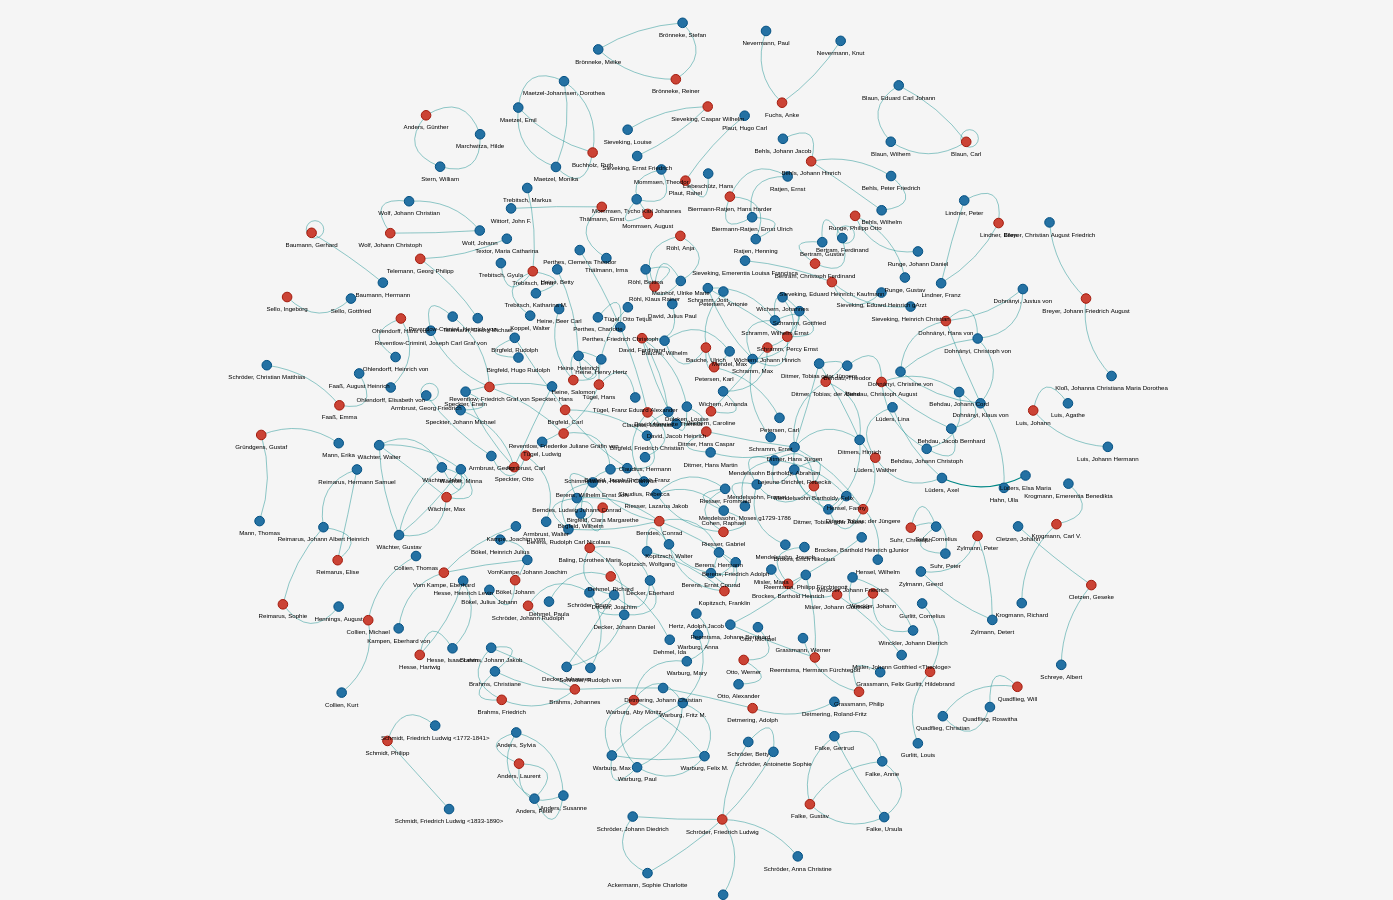

## Graph #3
Hier werden die Beziehungen zwischen Personen und Berufen dargestellt. Es sind die Default-Einstellungen des Algorithmus "repulsion" gewählt, der farbliche Unterschied der Nodes scheidet in Personen und Berufe. Es werden bei diesem Graphen andere Netzstrukturen generiert werden, als bei den Graphen mit einzelnen Subnetzen der Familien, die untereinander nicht verknüpft sind, da alle Teilnehmer theoretisch mit allen Berufen verknüpft sein können. 

In [ ]:
with open("hh_persons_job_5.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    #hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    #with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        #for line in infile_2:
            #hh_name = line[:-1]
            #hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
    g = Network(height="1000px", width="100%", bgcolor="#FBFCFC", font_color="black", layout=False)
        
        # Erzeugung "Hamburg-Node"
        #for hamburg in data_fam_2:
            #g.add_node(hamburg, color="#2471A3", size=100)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
    for person in hhbib_data:
        name = person["name"][0]
        relation = person["job"]
        bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            #random_colnumber = random.randint(0, 17687459)
            #hex_number = str(hex(random_colnumber))
            #hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
        g.add_node(name, color="#228b22", title=bio, size=10) 
        #g.add_node(relation, color="002b55", size=25)
        
            # Erzeugung der relationierten Nodes sowie den Edges
        for rela in relation:     
            g.add_node(rela, color="#ffd700", size=10)
            g.add_edge(name, rela, color="#228b22")
                
                # Erzeugung der "Hamburg-Edges"
                #for item in hamburg_edges:
                    #if item == name:
                        #g.add_edge(hamburg, name)
                    #if item == rela:
                        #g.add_edge(hamburg, rela)
        
        # Layout-Algorithmen
        #g.barnes_hut()        
        #g.force_atlas_2based(gravity=-20, spring_length=400)
        #g.hrepulsion()
    g.repulsion()
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
        
        # Erzeugung der Visualisierung und der html-Datei
    g.show("hhbib_networkGraph_6-17.html")

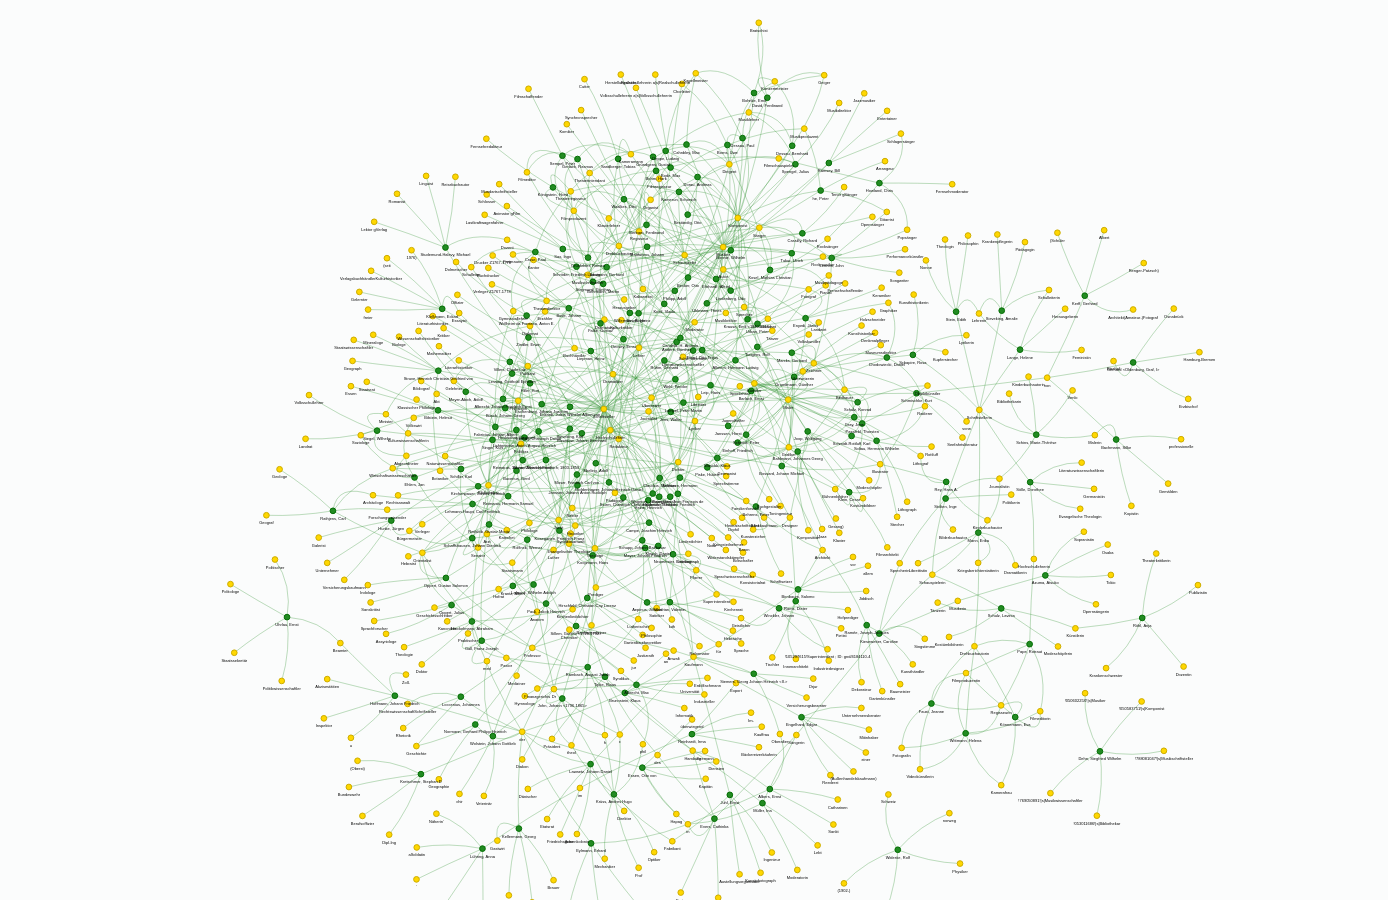

## Graph #4
Auch hier sind wieder Berufsbeziehungen dargestellt. Der Layoutalgorithmus "force_atlas_2based" in Kombination mit einem leicht niedrigeren Gravity-Wert als per Default vorgegeben bewirkt hier eine stärkere Anziehung, was den zusammengeballten Eindruck entstehen läßt. Der gravity-Faktor ist bei diesem Layoutalgoritmus zentral "[...] the central gravity model, which is here distance independent, and the repulsion being linear. [...]" (Pyvis 2022b).

In [ ]:
with open("hh_persons_job_5.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    #hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    #with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        #for line in infile_2:
            #hh_name = line[:-1]
            #hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
    g = Network(height="1000px", width="100%", bgcolor="#FBFCFC", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        #for hamburg in data_fam_2:
            #g.add_node(hamburg, color="#2471A3", size=100)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
    for person in hhbib_data:
        name = person["name"][0]
        relation = person["job"]
        bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            #random_colnumber = random.randint(0, 17687459)
            #hex_number = str(hex(random_colnumber))
            #hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
        g.add_node(name, color="#e10019", title=bio, size=10) 
        #g.add_node(relation, color="002b55", size=25)
        
            # Erzeugung der relationierten Nodes sowie den Edges
        for rela in relation:     
            g.add_node(rela, color="#1874cd", size=10)
            g.add_edge(name, rela, color="#1874cd")
                
                # Erzeugung der "Hamburg-Edges"
                #for item in hamburg_edges:
                    #if item == name:
                        #g.add_edge(hamburg, name)
                    #if item == rela:
                        #g.add_edge(hamburg, rela)
        
        # Layout-Algorithmen
        #g.barnes_hut()        
    g.force_atlas_2based(gravity=-10)
        #g.hrepulsion()
        #g.repulsion()
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
        
        # Erzeugung der Visualisierung und der html-Datei
    g.show("hhbib_networkGraph_6-11.html")

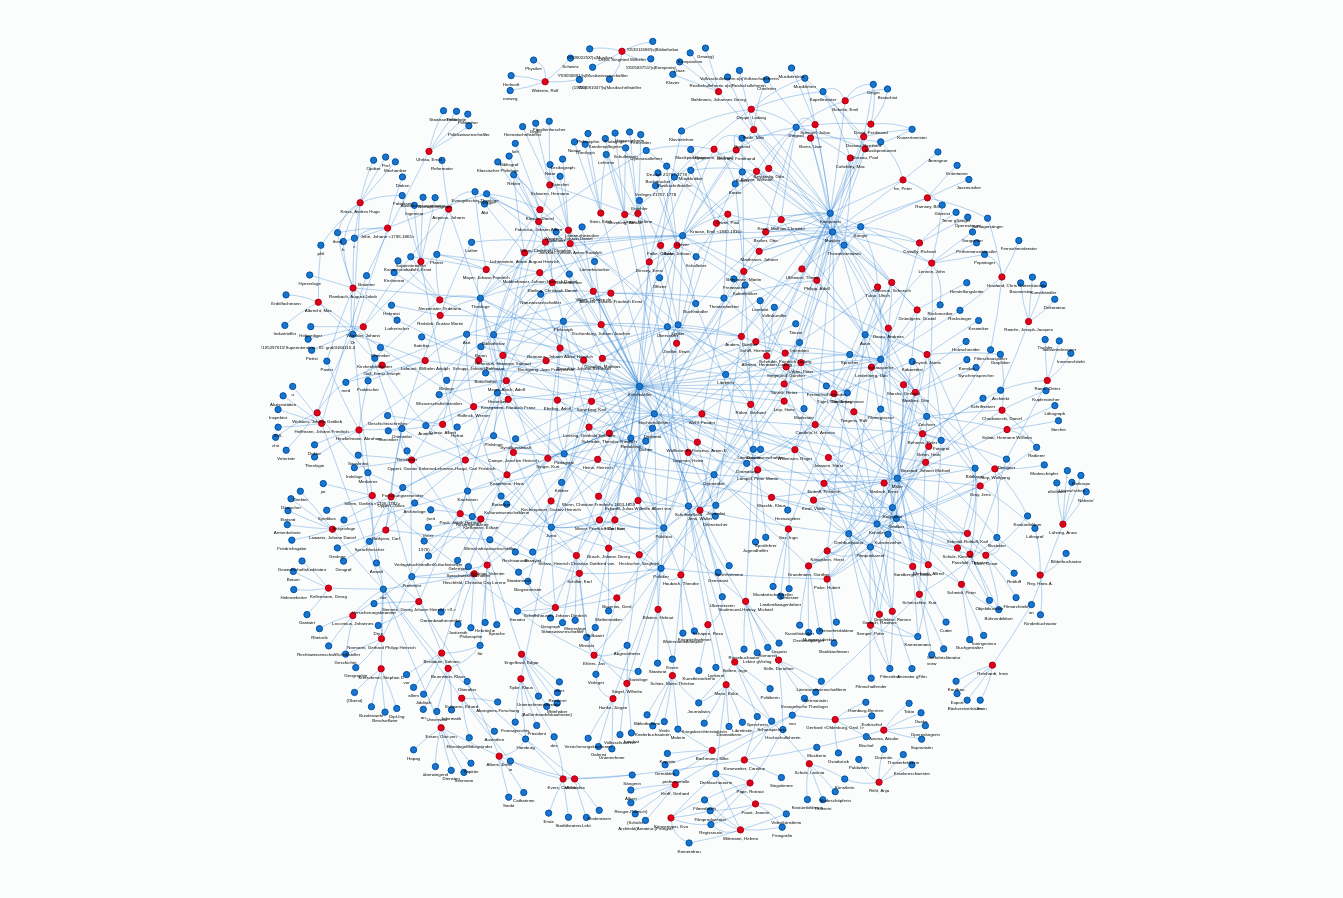

## Graph #5
Wie stark visuelle Eindrücke durch nur kleine Veränderungen differieren können, zeigt der Graph #5 im Vergleich zu Graph #2. Allein durch die Veränderung der Edges zu geraden Linien entsteht individuell gefühlt ein völlig anderer Graph.

In [ ]:
with open("hh_persons_fam_2.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    #hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    #with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        #for line in infile_2:
            #hh_name = line[:-1]
            #hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
    g = Network(height="1000px", width="100%", bgcolor="#f5f5f5", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        #for hamburg in data_fam_2:
            #g.add_node(hamburg, color="#2471A3", size=100)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
    for person in hhbib_data:
        name = person["name"][0]
        relation = person["relation_fam"]
        bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            #random_colnumber = random.randint(0, 17687459)
            #hex_number = str(hex(random_colnumber))
            #hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
        g.add_node(name, color="#CB4335", title=bio, size=5) 
            
            # Erzeugung der relationierten Nodes sowie den Edges
        for rela in relation:     
            g.add_node(rela, color="#2471A3", size=5)
            g.add_edge(name, rela, color="#018786", smooth=False)
                
                # Erzeugung der "Hamburg-Edges"
                #for item in hamburg_edges:
                    #if item == name:
                        #g.add_edge(hamburg, name)
                    #if item == rela:
                        #g.add_edge(hamburg, rela)
        
        # Layout-Algorithmen
        #g.barnes_hut()        
        #g.force_atlas_2based()
        #g.hrepulsion()
    g.repulsion(central_gravity=1.1)
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
    
        # Erzeugung der Visualisierung und der html-Datei
    g.show("hhbib_networkGraph_4-3.html")

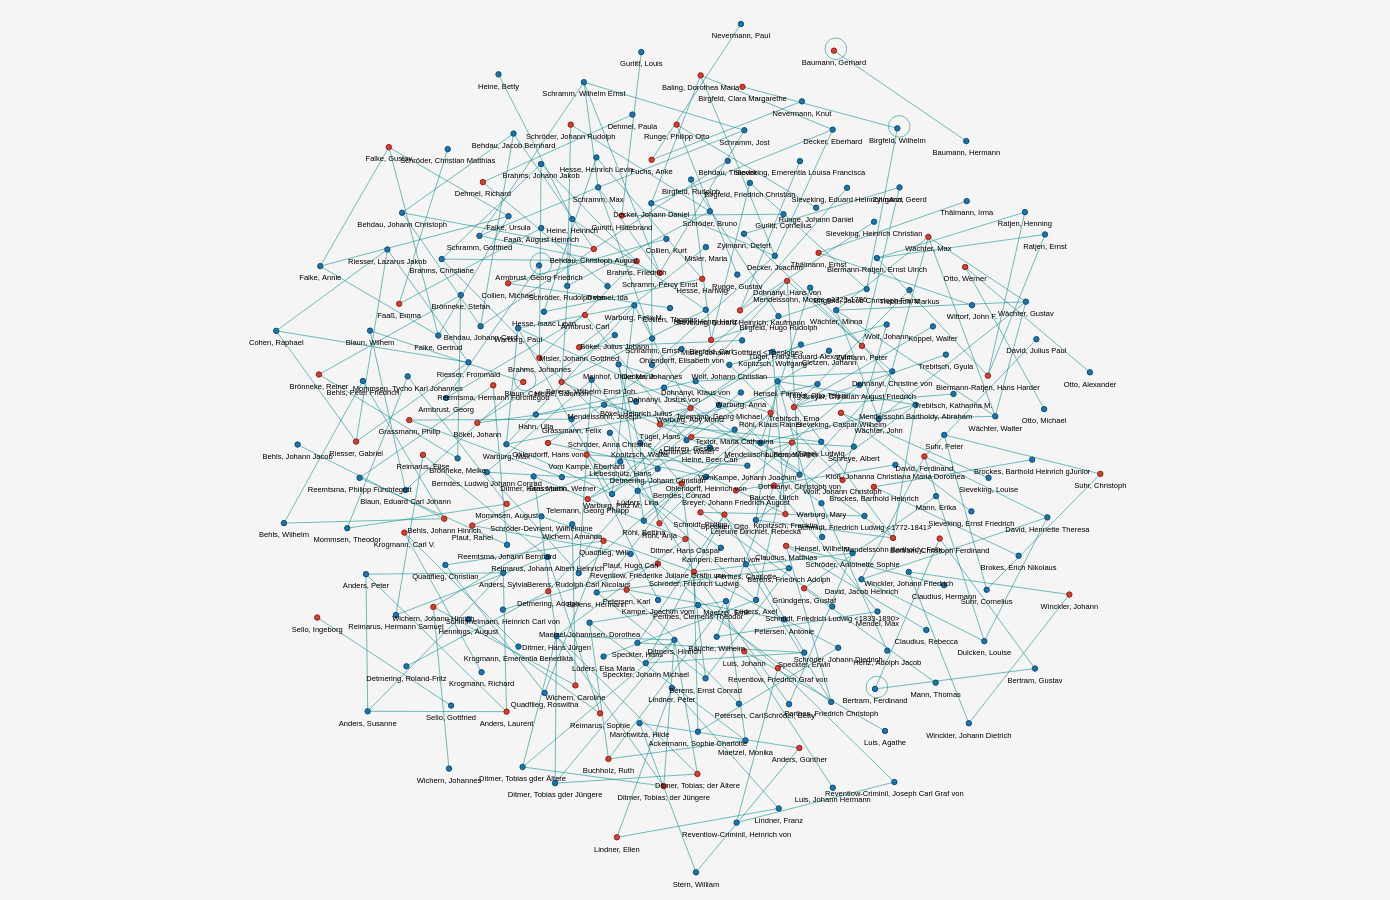

## Graph #6
Ein gänzlich anderer Ansatz zeigt Graph #6. Er ist einerseits wieder bestimmt durch strahlenförmig auskragende Edges durch die Verbindung mit dem Hamburg-Node  bei den Familienrelationen. Die Edges werden hier aber durch den hohen negativen Wert der spring_length (wie lang die Edges auseinander "federn/schnellen") im Vergleich zur default-Einstellung bestimmt sowie besonders durch den Null-overlap-Wert, der die höchste Überlappungsstufe der Nodes bedeutet, was den zusammengezogenen Eindruck der Nodes auf einer Linie bewirkt.

In [ ]:
with open("hh_persons_fam_2.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        for line in infile_2:
            hh_name = line[:-1]
            hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
        g = Network(height="1000px", width="100%", bgcolor="#f5f5f5", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        for hamburg in data_fam_2:
            g.add_node(hamburg, color="#668b8b", size=30)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
        for person in hhbib_data:
            name = person["name"][0]
            relation = person["relation_fam"]
            bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            random_colnumber = random.randint(0, 17687459)
            hex_number = str(hex(random_colnumber))
            hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
            g.add_node(name, color=hex_number, title=bio, size=12) 
            
            # Erzeugung der relationierten Nodes sowie den Edges
            for rela in relation:     
                g.add_node(rela, color=hex_number, size=12)
                g.add_edge(name, rela, color="#228b22", smooth=False)
                
                # Erzeugung der "Hamburg-Edges"
                for item in hamburg_edges:
                    if item == name:
                        g.add_edge(hamburg, name, color="#228b22", smooth=False)
                    if item == rela:
                        g.add_edge(hamburg, rela, color="#228b22", smooth=False)
        
        # Layout-Algorithmen
        #g.barnes_hut(overlap=0.5, spring_length=870, central_gravity=1.5)        
        g.force_atlas_2based(spring_length=-10, overlap=0, spring_strength=0.099)
        #g.hrepulsion()
        #g.repulsion(central_gravity=1.1)
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
    
        # Erzeugung der Visualisierung und der html-Datei
        g.show("hhbib_networkGraph_5-39.html")

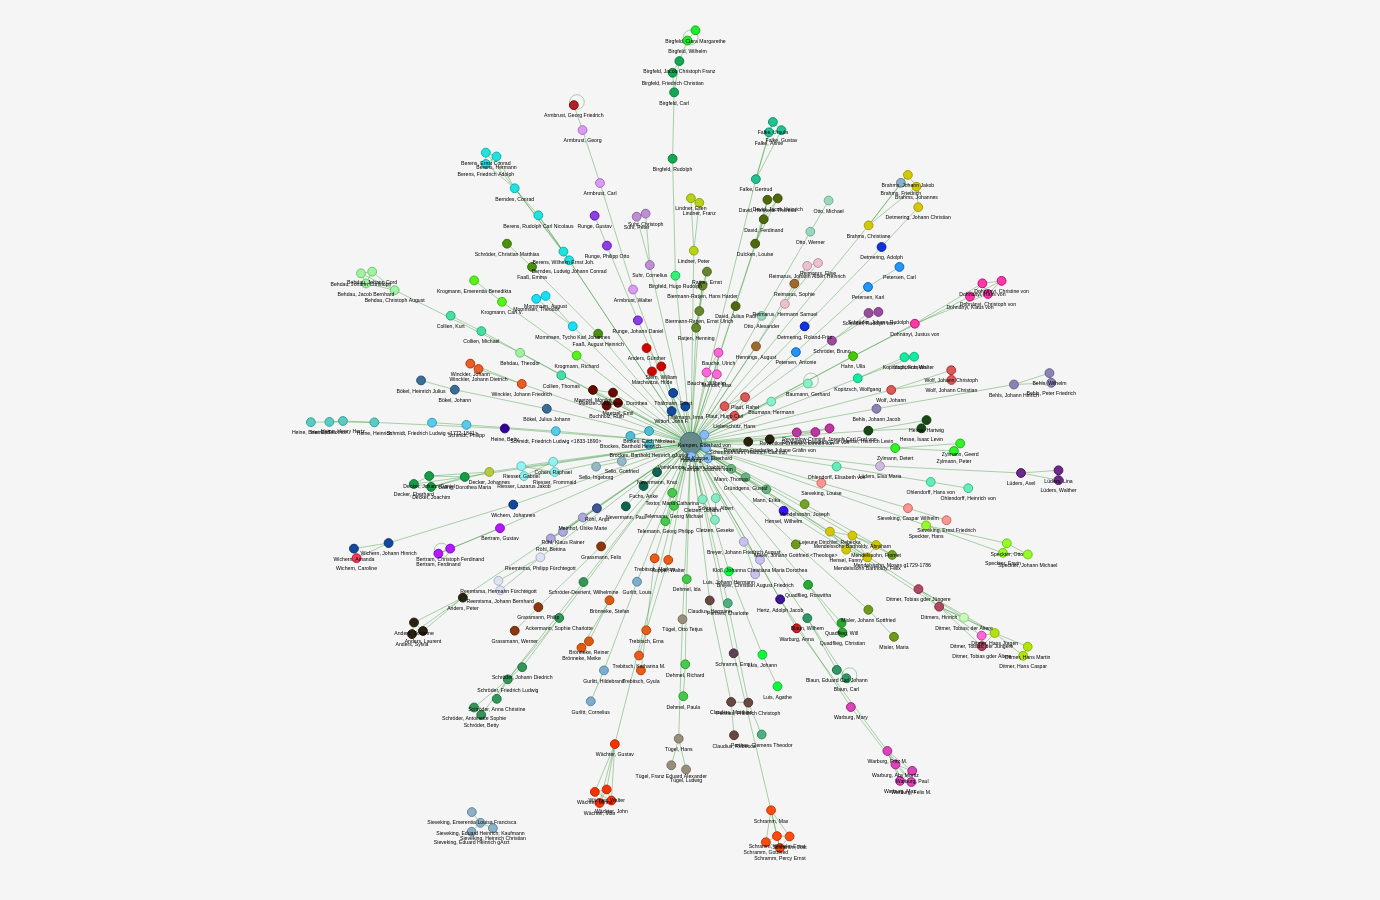

Die nächsten drei Visualisierungen zeigen Varianten, die - will man die Informationen, die in den Daten des Netzwerkgraphen enthalten sind, transportieren - trotz aller Interaktivität der Software dazu nicht so geeignet sind. Zwar können visuell interessante Eindrücke entstehen, aber will man Zusammenhänge oder Node-Labels erkennen, mögen diese Varianten nicht sehr hilfreich sein.

## Graph #7
In diesem Graphen werden Familiensubnetze dargestellt, unverbunden mit dem Hamburg-Node. Er ist mit den Default-Einstellungen des Layoutalgorithmus "hrepulsion" erstellt. Dieser Algorithmus ist grundsätzlich schwierig, will man Label-Text lesen können, da sehr stark in den Graphen gezoomt werden muss, bis die Labels lesbar sind. Der Algorithmus basiert ausserdem auf Abstossung der Nodes. Diese funktioniert besser, je mehr Nodes ein Netz hat. Durch die Nutzung des Datenpools, der auch Familienbeziehungen mit nur einem Verwandeten beinhaltet, entstehen "Zweiernetze", deren Nodes dadurch, hier begünstigt durch die Werte von spring_length und spring_strength, übereinandergelagert werden. Auch nicht komfortabel für eine Nutzung.

In [ ]:
with open("hh_persons_fam_all.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    #hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    #with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        #for line in infile_2:
            #hh_name = line[:-1]
            #hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
    g = Network(height="1000px", width="100%", bgcolor="#f5f5f5", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        #for hamburg in data_fam_2:
            #g.add_node(hamburg, color="#2471A3", size=100)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
    for person in hhbib_data:
        name = person["name"][0]
        relation = person["relation_fam"]
        bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            #random_colnumber = random.randint(0, 17687459)
            #hex_number = str(hex(random_colnumber))
            #hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
        g.add_node(name, color="#CB4335", title=bio, size=13) 
            
            # Erzeugung der relationierten Nodes sowie den Edges
        for rela in relation:     
            g.add_node(rela, color="#2471A3", size=10)
            g.add_edge(name, rela, color="#018786")
                
                # Erzeugung der "Hamburg-Edges"
                #for item in hamburg_edges:
                    #if item == name:
                        #g.add_edge(hamburg, name)
                    #if item == rela:
                        #g.add_edge(hamburg, rela)
        
        # Layout-Algorithmen
        #g.barnes_hut()        
        #g.force_atlas_2based()
    g.hrepulsion()
        #g.repulsion()
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
        
        # Erzeugung der Visualisierung und der html-Datei
    g.show("hhbib_networkGraph_3-1.html")

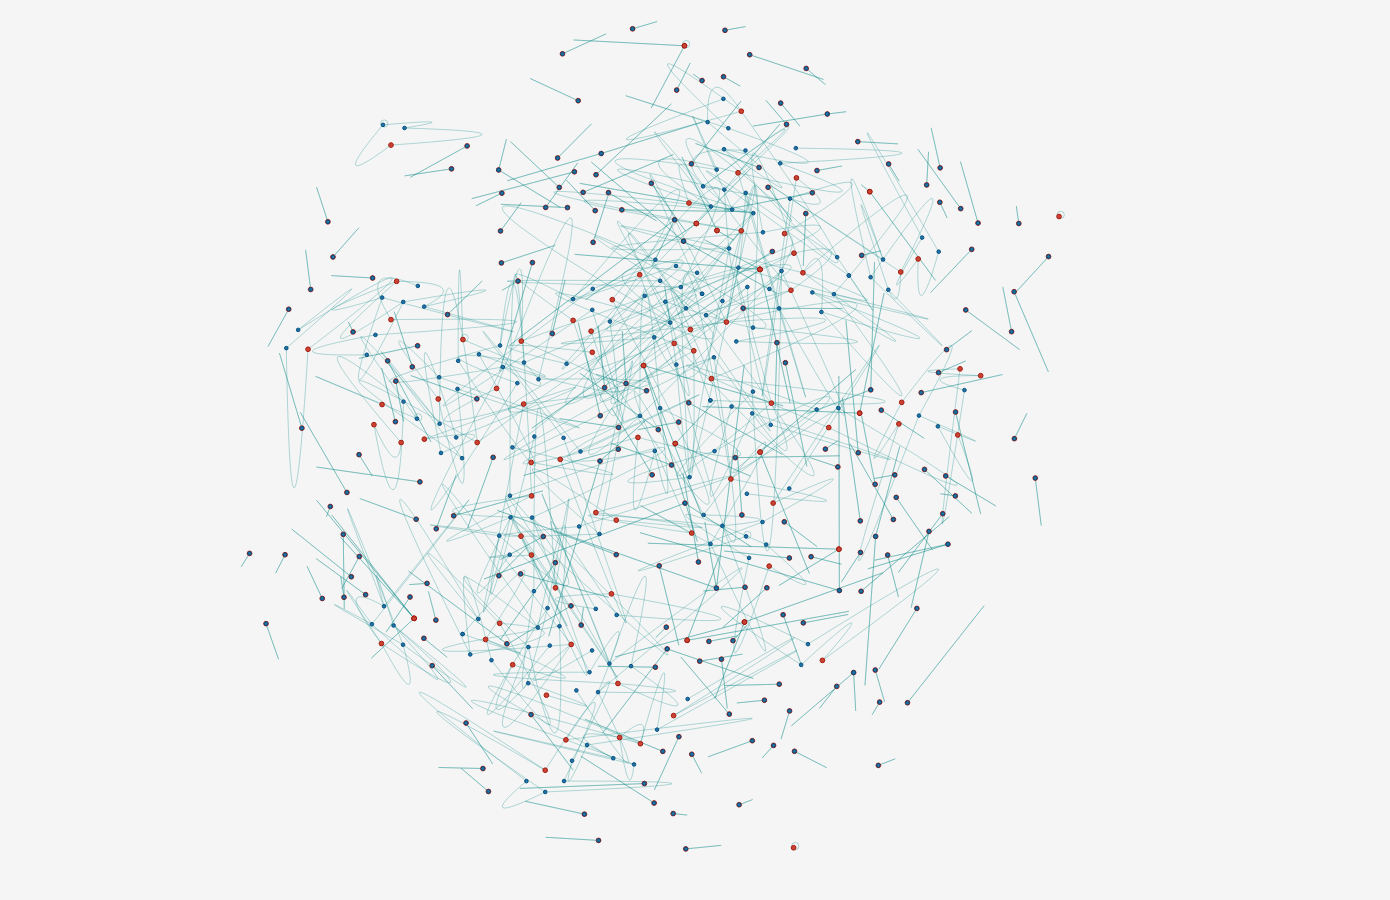

## Graph #8
Hier wird die Unpraktikabilität durch die Unseparierbarkeit der einzelnen Familienubnetze bedingt. Auch hier sind Familienbeziehungen ohne Verbindung zum Hamburg-Node dargestellt. Der Zug der einzelnen Subnetze zum Graphmittelpunkt, will man sie aus dem Konglomerat herausziehen, um zu erkennen, welche Personen dazu gehören, ist so stark, dass dieses Separieren per Drag nicht optimal funktioniert. 

In [ ]:
with open("hh_persons_fam_2.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    #hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    #with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        #for line in infile_2:
            #hh_name = line[:-1]
            #hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
    g = Network(height="1000px", width="100%", bgcolor="#f5f5f5", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        #for hamburg in data_fam_2:
            #g.add_node(hamburg, color="#2471A3", size=100)
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
    for person in hhbib_data:
        name = person["name"][0]
        relation = person["relation_fam"]
        bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            #random_colnumber = random.randint(0, 17687459)
            #hex_number = str(hex(random_colnumber))
            #hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
        g.add_node(name, color="#ff9900", title=bio, size=12) 
            
            # Erzeugung der relationierten Nodes sowie den Edges
        for rela in relation:     
            g.add_node(rela, color="#109618", size=10)
            g.add_edge(name, rela, color="#109618")
                
                # Erzeugung der "Hamburg-Edges"
                #for item in hamburg_edges:
                    #if item == name:
                        #g.add_edge(hamburg, name)
                    #if item == rela:
                        #g.add_edge(hamburg, rela)
        
        # Layout-Algorithmen
        #g.barnes_hut(overlap=0.5, spring_length=870, central_gravity=1.5)        
    g.force_atlas_2based(spring_length=220, central_gravity=0.05, overlap=1)
        #g.hrepulsion()
        #g.repulsion(central_gravity=1.1)
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
    
        # Erzeugung der Visualisierung und der html-Datei
    g.show("hhbib_networkGraph_5-9.html")

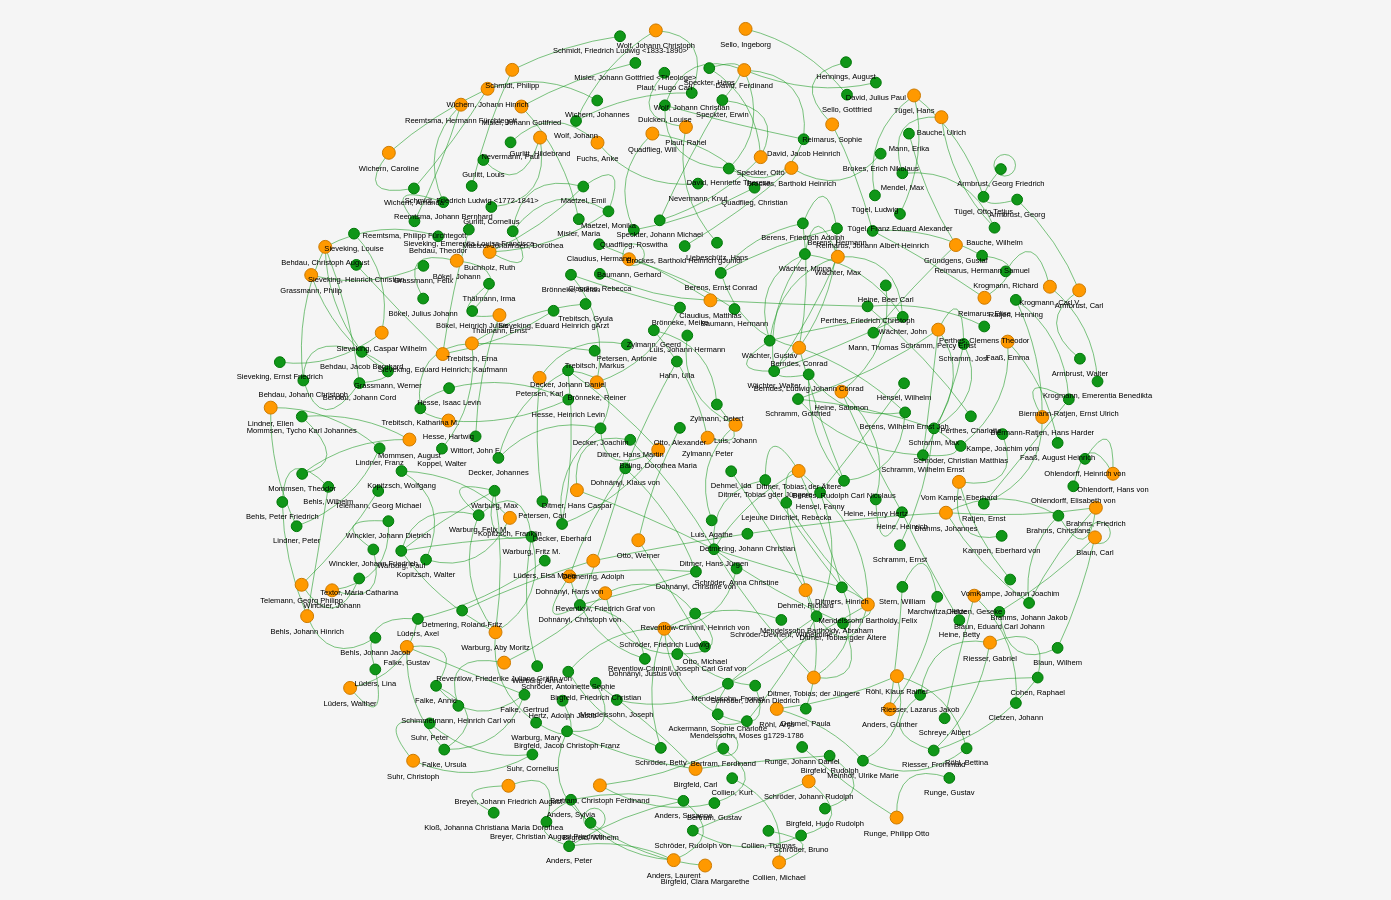

## Graph #9
Dieser Graph wurde auf Grundlage der Verbindung der Familiennetze mit dem Hamburg-Node mittels den Default-Einstellungen des Layoutalgorithmus "barnesHut" erstellt. Auch hier entsteht eine hübsch anzusehende Sonne mit ihren sich leicht bewegenden Planeten, aber auch hier ist der Zoom-Faktor so groß, dass - ist die Information erst einmal erreicht - sie nicht mehr visuell in den Beziehungszusammenhang gebracht werden kann, ohne wieder zurück zoomen zu müssen. 

In [16]:
with open("hh_persons_fam_2.json", "r", encoding = "utf-8") as infile:
    
    data_fam_2 = json.load(infile)
    hhbib_data = data_fam_2["Hamburg"]
    hamburg_edges = []
    
    # Laden der Datei "hamburg_edges.txt" und Erzeugung der Liste für die "Hamburg-Edges"
    with open("hamburg_edges.txt", "r", encoding = "utf-8") as infile_2:
        for line in infile_2:
            hh_name = line[:-1]
            hamburg_edges.append(hh_name)
               
        # Erzeugung des Graphen
        g = Network(height="1000px", width="100%", bgcolor="#f5f5f5", font_color="black")
        
        # Erzeugung "Hamburg-Node"
        for hamburg in data_fam_2:
            g.add_node(hamburg, color="#2471A3", size=100, physics=False, color_borderWidth="#00ff00")
               
        # Erzeugung von Variablen für Nodes, relationierte Nodes, Title der Nodes    
        for person in hhbib_data:
            name = person["name"][0]
            relation = person["relation_fam"]
            bio = person["bio"]
            
            # Erzeugung einer Variablen zur Zuweisung von zufällig generierten Hex-ColorCodes zu den Nodes
            #random_colnumber = random.randint(0, 17687459)
            #hex_number = str(hex(random_colnumber))
            #hex_number = "#" + hex_number[2:]
            
            # Erzeugung der Hauptnodes
            g.add_node(name, color="#CB4335", title=bio, size=70) 
            
            # Erzeugung der relationierten Nodes sowie den Edges
            for rela in relation:     
                g.add_node(rela, color="#2471A3", size=70)
                g.add_edge(name, rela, color="#018786")
                
                # Erzeugung der "Hamburg-Edges"
                for item in hamburg_edges:
                    if item == name:
                        g.add_edge(hamburg, name)
                    if item == rela:
                        g.add_edge(hamburg, rela)
        
        # Layout-Algorithmen
        g.barnes_hut()        
        #g.force_atlas_2based(spring_length=0)
        #g.hrepulsion()
        #g.repulsion()
        #g.show_buttons()
        #g.set_options(''' var options = {
        #"nodes": {"font": {"size": 20}},
        #"physics": {"barnesHut": {"springLength": 400, "springConstant": 0.1}}}  ''')
    
        # Erzeugung der Visualisierung und der html-Datei
        g.show("hhbib_networkGraph_5-21.html")

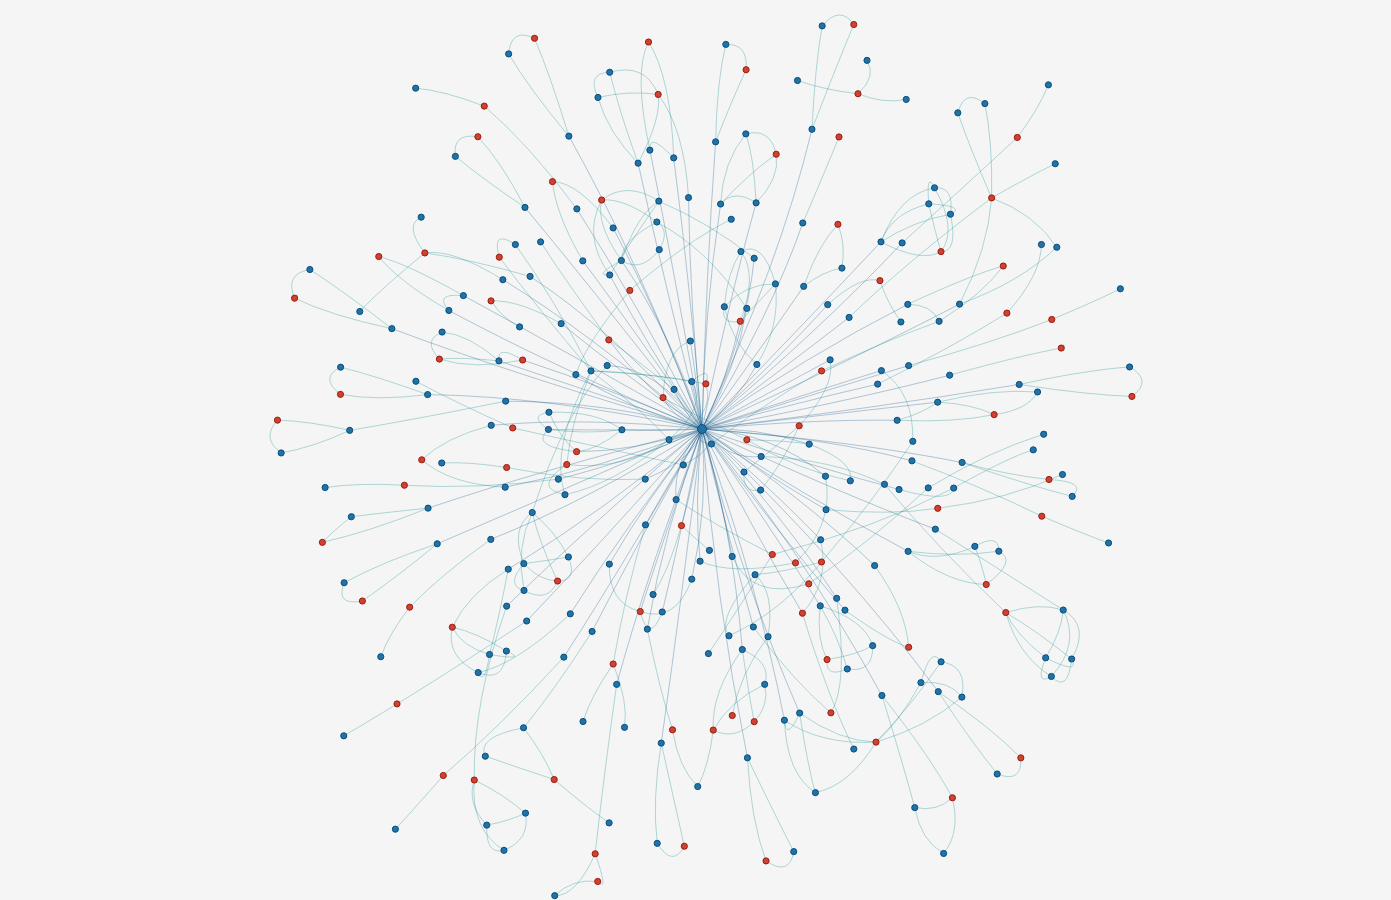